# Prueba Tecnica DataKnow

In [163]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Carga de información 

Se lee el archivo txt

In [3]:
with open('../Datos3/OFEI1204.txt', 'r') as file:
    txt_data = file.read()

print(txt_data)

Ofertas Iniciales para: 2017-12-04


AGENTE: AES CHIVOR
CHIVOR1 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR2 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR3 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR4 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR5 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR6 , D,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125,  125
CHIVOR7 

Se divide el contenido por agente

In [4]:
agentes = []
dfs = []

secciones = txt_data.split("AGENTE:")
for seccion in secciones[1:]:
    agente, tabla_str = seccion.split("\n", 1)
    agentes.append(agente.strip())
    tabla = pd.read_csv(StringIO(tabla_str), delimiter=',', skipinitialspace=True, header=None)
    tabla['AGENTE'] = agente.strip()
    dfs.append(tabla)

df_final = pd.concat(dfs, ignore_index=True)
df_final[df_final["AGENTE"]=="EEPPM"]

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,AGENTE
67,ESMERALDA1,D,14,14.00,14.00,14.00,14.00,14.00,14.00,14.00,...,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,EEPPM
68,ESMERALDA2,D,14,14.00,14.00,14.00,14.00,14.00,14.00,14.00,...,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,EEPPM
69,GUATAPE1,D,70,70.00,70.00,70.00,70.00,70.00,70.00,70.00,...,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,EEPPM
70,GUATAPE2,D,70,70.00,70.00,70.00,70.00,70.00,70.00,70.00,...,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,EEPPM
71,GUATAPE3,D,70,70.00,70.00,70.00,70.00,70.00,70.00,70.00,...,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,EEPPM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,RIOGRANDE,D,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,EEPPM
161,MUNICIPAL,D,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,...,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,EEPPM
162,PORCEIIIMENOR,D,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,EEPPM
163,COGENERADORCOLTEJER1,D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,EEPPM


Se procesan solo los registros Tipo D

In [5]:
df_filtrado_tipo_D = df_final[df_final[1]=="D"].reset_index(drop=True)
df_filtrado_tipo_D

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,AGENTE
0,CHIVOR1,D,125.0,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
1,CHIVOR2,D,125.0,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
2,CHIVOR3,D,125.0,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
3,CHIVOR4,D,125.0,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
4,CHIVOR5,D,125.0,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,SANTIAGO,D,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,...,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,VATIA S.A.
301,INCAUCA1,D,8.5,8.50,8.50,8.50,8.50,8.50,8.50,8.50,...,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,VATIA S.A.
302,INGENIOPROVIDENCIA2,D,13.8,13.80,13.80,13.80,13.80,13.80,13.80,13.80,...,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,VATIA S.A.
303,FLORES1,D,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ZF CELSIA


Se renombran las columnas y se genera la tabla final

In [6]:
df_filtrado_tipo_D.columns = ['PLANTA'] + ['TIPO'] + [f'Hora_{i-1}' if i > 1 else 'PLANTA' for i in range(2, 26)] + ['AGENTE']
df_tabla_punto_1 = df_filtrado_tipo_D.drop(columns=['TIPO'])
columnas_hora = [col for col in df_tabla_punto_1.columns if col.startswith('Hora')]
df_tabla_punto_1[columnas_hora] = df_tabla_punto_1[columnas_hora].astype(float)
df_tabla_punto_1.to_csv("../resultados/tabla_punto_1.csv")

df_tabla_punto_1

,PLANTA,Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24,AGENTE
0,CHIVOR1,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
1,CHIVOR2,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
2,CHIVOR3,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
3,CHIVOR4,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
4,CHIVOR5,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,AES CHIVOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,SANTIAGO,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,...,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,1.52,VATIA S.A.
301,INCAUCA1,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,...,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,8.50,VATIA S.A.
302,INGENIOPROVIDENCIA2,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,...,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,13.80,VATIA S.A.
303,FLORES1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ZF CELSIA


## 2. Manipulación de datos

In [7]:
columnas_seleccionadas = ['Nombre visible Agente', 'AGENTE (OFEI)' , 'CENTRAL (dDEC, dSEGDES, dPRU…)' , 'Tipo de central (Hidro, Termo, Filo, Menor)'] 

df_master_data = pd.read_excel("../Datos3/Datos Maestros VF.xlsx", sheet_name='Master Data Oficial', usecols=columnas_seleccionadas)

df_master_data

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)"
0,RIO PIEDRAS,ENERGIA RIO PIEDRAS,MAGUAFRE,M
1,ALEJANDRÍA,PCH ALEJANDRÍA,M_ALEJANDRIA,M
2,EPSA,EPSA(PACIFICO),ALBAN,H
3,EPSA,EPSA(PACIFICO),ALBAN,H
4,EPSA,EPSA(PACIFICO),ALBAN,H
...,...,...,...,...
298,VATIA,VATIA S.A.,MVENTANA_B,M
299,EMGESA,EMGESA S.A.,ZIPAEMG2,T
300,EMGESA,EMGESA S.A.,ZIPAEMG3,T
301,EMGESA,EMGESA S.A.,ZIPAEMG4,T


In [8]:
df_master_data_emgesa = df_master_data[
    (df_master_data["Nombre visible Agente"] == "EMGESA") &
    ((df_master_data["Tipo de central (Hidro, Termo, Filo, Menor)"] == "H") |
     (df_master_data["Tipo de central (Hidro, Termo, Filo, Menor)"] == "T"))
].reset_index(drop=True)

df_master_data_emgesa

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)"
0,EMGESA,EMGESA S.A.,BETANIA,H
1,EMGESA,EMGESA S.A.,BETANIA,H
2,EMGESA,EMGESA S.A.,BETANIA,H
3,EMGESA,EMGESA S.A.,CTGEMG1,T
4,EMGESA,EMGESA S.A.,CTGEMG2,T
5,EMGESA,EMGESA S.A.,CTGEMG3,T
6,EMGESA,EMGESA S.A.,ELQUIMBO,H
7,EMGESA,EMGESA S.A.,ELQUIMBO,H
8,EMGESA,EMGESA S.A.,GUAVIO,H
9,EMGESA,EMGESA S.A.,GUAVIO,H


In [9]:
df_dec_1204 = pd.read_csv("../Datos3/dDEC1204.TXT", delimiter=',', encoding='latin1',header=None)
df_dec_1204 = df_dec_1204.drop(df_dec_1204.index[-1])
df_dec_1204

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,AG_ARGOSCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AG_ARGOSYUM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AG_ELCAIRO,0,0,0,1,3,3,3,3,3,...,3,0,0,0,0,1,3,3,3,3
3,AG_REFICAR,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,AG_UNIBOL,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,VENEZUE1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,ZIPAEMG2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,ZIPAEMG3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,ZIPAEMG4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_dec_1204.columns = ['CENTRAL (dDEC, dSEGDES, dPRU…)'] + [f'Hora_{i}' for i in range(1, 25)]

df_dec_1204

,"CENTRAL (dDEC, dSEGDES, dPRU…)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,...,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24
0,AG_ARGOSCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AG_ARGOSYUM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AG_ELCAIRO,0,0,0,1,3,3,3,3,3,...,3,0,0,0,0,1,3,3,3,3
3,AG_REFICAR,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,AG_UNIBOL,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,VENEZUE1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,ZIPAEMG2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,ZIPAEMG3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,ZIPAEMG4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_merged_emgesa = pd.merge(df_master_data_emgesa, df_dec_1204, on='CENTRAL (dDEC, dSEGDES, dPRU…)', how='left')

df_merged_emgesa

,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,...,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24
0,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
1,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
2,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
3,EMGESA,EMGESA S.A.,CTGEMG1,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EMGESA,EMGESA S.A.,CTGEMG2,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,EMGESA,EMGESA S.A.,CTGEMG3,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
7,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
8,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,180,120,120,997,1002,780,140,0,0
9,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,180,120,120,997,1002,780,140,0,0


In [12]:
columnas_hora = [col for col in df_merged_emgesa.columns if col.startswith('Hora')]
df_merged_emgesa['Total_Horas'] = df_merged_emgesa[columnas_hora].sum(axis=1)
df_tabla_punto_2 = df_merged_emgesa[df_merged_emgesa['Total_Horas']>0]
df_tabla_punto_2.to_csv("../resultados/tabla_punto_2.csv")

df_tabla_punto_2


,Nombre visible Agente,AGENTE (OFEI),"CENTRAL (dDEC, dSEGDES, dPRU…)","Tipo de central (Hidro, Termo, Filo, Menor)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24,Total_Horas
0,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
1,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
2,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
6,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,2040
7,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,2040
8,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,120,120,997,1002,780,140,0,0,4325
9,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,120,120,997,1002,780,140,0,0,4325
10,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,120,120,997,1002,780,140,0,0,4325
11,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,120,120,997,1002,780,140,0,0,4325
12,EMGESA,EMGESA S.A.,GUAVIO,H,0,0,0,0,0,0,...,180,120,120,997,1002,780,140,0,0,4325


## Punto 3

La realización de este punto se realizo en https://sqliteonline.com/ , para mayo información por favor dirigirse al archico .docx en la carpeta docs, el archivo punto_3.sqlite.sql tiene el query para la creación de las tablas

# Punto 4

Esta prueba de AWS se muestra documentada en la documentacion.docx presente en la carpeta docs.

El archivo de Querys se encuentra en [SQL Notebook](tickit-sample-notebook.ipynb)

# Punto 5


Esta prueba de Azure se muestra documentada en la documentacion.docx en la carpeta docs

# Punto 6


In [34]:
train_data = pd.read_csv('../Datos3/train.csv')

train_data

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.00,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.00,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.00,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,622529101,1,993430.04,19,180.65,POS,20150519,US,POS,2,...,103918285.0,95475378.0,4,8944.83,2236.21,3646.67,4,96.86,4552.41,484.30
2961,2043206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,...,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2962,2943206272,0,9957.05,10,318.50,POS,20150524,US,POS,0,...,23625000.0,5000000.0,3,27648.32,3949.76,4552.41,11,82.67,4552.41,2810.75
2963,3136302872,0,996191.64,15,234.42,POS,20150513,US,MCI,3,...,56666000.0,37600750.0,1,NaN,NaN,NaN,3,219.46,4552.41,1316.79


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2965 non-null   int64  
 1   FRAUDE           2965 non-null   int64  
 2   VALOR            2965 non-null   float64
 3   HORA_AUX         2965 non-null   int64  
 4   Dist_max_NAL     2965 non-null   float64
 5   Canal1           2965 non-null   object 
 6   FECHA            2965 non-null   int64  
 7   COD_PAIS         2965 non-null   object 
 8   CANAL            2965 non-null   object 
 9   DIASEM           2965 non-null   int64  
 10  DIAMES           2965 non-null   int64  
 11  FECHA_VIN        2941 non-null   float64
 12  OFICINA_VIN      2941 non-null   float64
 13  SEXO             2910 non-null   object 
 14  SEGMENTO         2941 non-null   object 
 15  EDAD             2941 non-null   float64
 16  INGRESOS         2941 non-null   float64
 17  EGRESOS       

In [94]:
columns_to_drop = ['id', 'HORA_AUX', 'FECHA', 'FECHA_VIN', 'OFICINA_VIN', 'NROPAISES', 
                   'Dist_Sum_INTER', 'Dist_Mean_INTER', 'NROCIUDADES', 'Dist_Mean_NAL', 
                   'Dist_HOY', 'Dist_sum_NAL' , 'Dist_Max_INTER' , 'Dist_max_NAL']

train_data_cut = train_data.drop(columns=columns_to_drop)

train_data_cut

,FRAUDE,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS
0,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
1,1,0.00,ATM_INT,US,ATM_INT,5,15,M,Personal Plus,29.0,5643700.0,500000.0
2,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
3,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
4,1,0.00,ATM_INT,CR,ATM_INT,0,10,M,Personal,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1,993430.04,POS,US,POS,2,19,F,Preferencial,48.0,103918285.0,95475378.0
2961,0,9957.05,POS,US,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2962,0,9957.05,POS,US,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2963,0,996191.64,POS,US,MCI,3,13,F,PYME,34.0,56666000.0,37600750.0


In [128]:
train_data_clean = train_data_cut.dropna().reset_index(drop=True)

train_data_clean

,FRAUDE,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS
0,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
1,1,0.00,ATM_INT,US,ATM_INT,5,15,M,Personal Plus,29.0,5643700.0,500000.0
2,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
3,1,0.00,ATM_INT,US,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
4,1,0.00,ATM_INT,CR,ATM_INT,0,10,M,Personal,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1,993430.04,POS,US,POS,2,19,F,Preferencial,48.0,103918285.0,95475378.0
2906,0,9957.05,POS,US,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2907,0,9957.05,POS,US,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2908,0,996191.64,POS,US,MCI,3,13,F,PYME,34.0,56666000.0,37600750.0


In [129]:
iso_country_codes = ['AF', 'AX', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BV', 'BR', 'IO', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'TD', 'CL', 'CN', 'CX', 'CC', 'CO', 'KM', 'CG', 'CD', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'TF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'HM', 'VA', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'KP', 'KR', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MK', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM', 'MD', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', 'NA', 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG', 'NU', 'NF', 'MP', 'NO', 'OM', 'PK', 'PW', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PN', 'PL', 'PT', 'PR', 'QA', 'RE', 'RO', 'RU', 'RW', 'BL', 'SH', 'KN', 'LC', 'MF', 'PM', 'VC', 'WS', 'SM', 'ST', 'SA', 'SN', 'RS', 'SC', 'SL', 'SG', 'SX', 'SK', 'SI', 'SB', 'SO', 'ZA', 'GS', 'SS', 'ES', 'LK', 'SD', 'SR', 'SJ', 'SE', 'CH', 'SY', 'TW', 'TJ', 'TZ', 'TH', 'TL', 'TG', 'TK', 'TO', 'TT', 'TN', 'TR', 'TM', 'TC', 'TV', 'UG', 'UA', 'AE', 'GB', 'US', 'UM', 'UY', 'UZ', 'VU', 'VE', 'VN', 'VG', 'VI', 'WF', 'EH', 'YE', 'ZM', 'ZW']

# Crear un mapeo de códigos de país a números
codigo_pais_a_numero = {codigo: i for i, codigo in enumerate(iso_country_codes)}

# Aplicar el mapeo a la columna 'COD_PAIS'
train_data_clean['COD_PAIS'] = train_data_clean['COD_PAIS'].map(codigo_pais_a_numero)

train_data_clean

,FRAUDE,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS
0,1,0.00,ATM_INT,235,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
1,1,0.00,ATM_INT,235,ATM_INT,5,15,M,Personal Plus,29.0,5643700.0,500000.0
2,1,0.00,ATM_INT,235,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
3,1,0.00,ATM_INT,235,ATM_INT,5,1,M,Personal Plus,29.0,1200000.0,1200000.0
4,1,0.00,ATM_INT,53,ATM_INT,0,10,M,Personal,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1,993430.04,POS,235,POS,2,19,F,Preferencial,48.0,103918285.0,95475378.0
2906,0,9957.05,POS,235,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2907,0,9957.05,POS,235,POS,0,24,F,Preferencial,35.0,23625000.0,5000000.0
2908,0,996191.64,POS,235,MCI,3,13,F,PYME,34.0,56666000.0,37600750.0


In [132]:
X = train_data_clean.drop('FRAUDE', axis=1)
y = train_data_clean['FRAUDE']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [134]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [135]:
# Inicializar el modelo
rf_model = RandomForestClassifier()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(rf_model, param_grid, cv=15, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros después de GridSearchCV:", grid_search.best_params_)

# Inicializar un nuevo modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**grid_search.best_params_)

# Realizar una búsqueda aleatoria para una mayor eficiencia
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=20, cv=15, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores hiperparámetros después de RandomizedSearchCV
print("Mejores hiperparámetros después de RandomizedSearchCV:", random_search.best_params_)

best_rf_model_random = RandomForestClassifier(**random_search.best_params_)


Mejores hiperparámetros después de GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejores hiperparámetros después de RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [136]:
# Inicializar el modelo SVM
svm_model = SVC()

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros después de GridSearchCV:", grid_search.best_params_)

# Inicializar un nuevo modelo SVM con los mejores hiperparámetros
best_svm_model = SVC(**grid_search.best_params_)

# Realizar una búsqueda aleatoria para una mayor eficiencia
random_search = RandomizedSearchCV(svm_model, param_grid, n_iter=5, cv=15, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores hiperparámetros después de RandomizedSearchCV
print("Mejores hiperparámetros después de RandomizedSearchCV:", random_search.best_params_)

# Inicializar un nuevo modelo SVM con los mejores hiperparámetros encontrados
best_svm_model_random = SVC(**random_search.best_params_)

Mejores hiperparámetros después de GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejores hiperparámetros después de RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [137]:
best_rf_model.fit(X_train_resampled, y_train_resampled)
best_rf_model_random.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
predictions_grid = best_rf_model.predict(X_test)
predictions_random = best_rf_model_random.predict(X_test)

# Evaluar el rendimiento de los modelos
accuracy_grid = accuracy_score(y_test, predictions_grid)
accuracy_random = accuracy_score(y_test, predictions_random)

report_grid = classification_report(y_test, predictions_grid)
report_random = classification_report(y_test, predictions_random)

# Entrenar los modelos SVM con datos balanceados
best_svm_model.fit(X_train_resampled, y_train_resampled)
best_svm_model_random.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
predictions_svm_grid = best_svm_model.predict(X_test)
predictions_svm_random = best_svm_model_random.predict(X_test)

# Evaluar el rendimiento de los modelos SVM
accuracy_svm_grid = accuracy_score(y_test, predictions_svm_grid)
accuracy_svm_random = accuracy_score(y_test, predictions_svm_random)

report_svm_grid = classification_report(y_test, predictions_svm_grid)
report_svm_random = classification_report(y_test, predictions_svm_random)

print("Rendimiento del modelo SVM con mejores hiperparámetros de GridSearchCV:")
print(f'Accuracy: {accuracy_svm_grid}')
print('Classification Report:\n', report_svm_grid)

print("\nRendimiento del modelo SVM con mejores hiperparámetros de RandomizedSearchCV:")
print(f'Accuracy: {accuracy_svm_random}')
print('Classification Report:\n', report_svm_random)

print("Rendimiento del modelo Random Forest con mejores hiperparámetros de GridSearchCV:")
print(f'Accuracy: {accuracy_grid}')
print('Classification Report:\n', report_grid)

print("\nRendimiento del modelo Random Forest con mejores hiperparámetros de RandomizedSearchCV:")
print(f'Accuracy: {accuracy_random}')
print('Classification Report:\n', report_random)

Rendimiento del modelo SVM con mejores hiperparámetros de GridSearchCV:
Accuracy: 0.570446735395189
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.49      0.63       429
           1       0.36      0.80      0.49       153

    accuracy                           0.57       582
   macro avg       0.61      0.64      0.56       582
weighted avg       0.74      0.57      0.59       582


Rendimiento del modelo SVM con mejores hiperparámetros de RandomizedSearchCV:
Accuracy: 0.570446735395189
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.49      0.63       429
           1       0.36      0.80      0.49       153

    accuracy                           0.57       582
   macro avg       0.61      0.64      0.56       582
weighted avg       0.74      0.57      0.59       582

Rendimiento del modelo Random Forest con mejores hiperparámetros de GridSearchCV:
Accuracy:

Se escoge el best_rf_model GridSearchCV debido a que preoriza los falsos positivos, es preferible identificar una transación no fraudalenta como fraudelnta a no identificar una fraudulenta

In [143]:
test_data = pd.read_csv('../Datos3/test.csv')

selected_columns = train_data_clean.columns
test_data_selected = test_data[selected_columns].drop('FRAUDE', axis=1)
test_data_selected['COD_PAIS'] = test_data_selected['COD_PAIS'].map(codigo_pais_a_numero)

test_data_selected

,VALOR,Canal1,COD_PAIS,CANAL,DIASEM,DIAMES,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS
0,42230.09,POS,235,POS,5,15,F,Personal Plus,46,20000000,10000000
1,143202.65,POS,235,MCI,3,6,F,Preferencial,56,11000000,4500000
2,243591.25,ATM_INT,64,ATM_INT,0,17,F,Personal Plus,33,9000000,4000000
3,238267.40,ATM_INT,64,ATM_INT,5,8,F,Personal Plus,53,2300000,500000
4,490403.58,ATM_INT,235,ATM_INT,5,1,M,Personal,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,531534.03,POS,235,POS,5,1,M,Preferencial,51,19327667,3000000
96,52035.08,POS,12,POS,0,3,M,Preferencial,40,35500000,2000000
97,18309.04,POS,235,POS,5,15,M,Personal Plus,43,3100000,2000000
98,496906.75,ATM_INT,235,ATM_INT,6,16,M,Personal Plus,40,24000000,10500000


In [159]:
test_data_selected = pd.get_dummies(test_data_selected)

test_data_selected["SEGMENTO_Empresarial"] = False

test_data_selected = test_data_selected[X_train.columns]

In [160]:
test_data_selected

,VALOR,COD_PAIS,DIASEM,DIAMES,EDAD,INGRESOS,EGRESOS,Canal1_ATM_INT,Canal1_POS,CANAL_ATM_INT,CANAL_MCI,CANAL_POS,SEXO_F,SEXO_M,SEGMENTO_Emprendedor,SEGMENTO_Empresarial,SEGMENTO_PYME,SEGMENTO_Personal,SEGMENTO_Personal Plus,SEGMENTO_Preferencial
0,42230.09,235,5,15,46,20000000,10000000,False,True,False,False,True,True,False,False,False,False,False,True,False
1,143202.65,235,3,6,56,11000000,4500000,False,True,False,True,False,True,False,False,False,False,False,False,True
2,243591.25,64,0,17,33,9000000,4000000,True,False,True,False,False,True,False,False,False,False,False,True,False
3,238267.40,64,5,8,53,2300000,500000,True,False,True,False,False,True,False,False,False,False,False,True,False
4,490403.58,235,5,1,0,0,0,True,False,True,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,531534.03,235,5,1,51,19327667,3000000,False,True,False,False,True,False,True,False,False,False,False,False,True
96,52035.08,12,0,3,40,35500000,2000000,False,True,False,False,True,False,True,False,False,False,False,False,True
97,18309.04,235,5,15,43,3100000,2000000,False,True,False,False,True,False,True,False,False,False,False,True,False
98,496906.75,235,6,16,40,24000000,10500000,True,False,True,False,False,False,True,False,False,False,False,True,False


In [153]:
# Obtener probabilidades en lugar de predicciones binarias
test_probabilities = best_rf_model.predict_proba(test_data_selected)

# Crear un DataFrame con las probabilidades
result_df = pd.DataFrame({'FRAUDE_probabilidad': test_probabilities[:, 1]})

result_df

,FRAUDE_probabilidad
0,0.055
1,0.010
2,1.000
3,1.000
4,0.985
...,...
95,0.210
96,0.015
97,0.045
98,0.135


In [156]:
test_data["FRAUDE"] = result_df
test_data.to_csv("../resultados/tabla_punto_6.csv")

test_data

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,0.055,42230.09,18,1.00,1.00,POS,20150515,US,POS,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,0.010,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,...,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,1.000,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,...,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,1.000,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,...,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,0.985,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9970518152,0.210,531534.03,13,340.09,1.00,POS,20150501,US,POS,...,NaN,NaN,4,844.35,56.29,4552.41,844.35,56.29,1.00,1.00
96,9971748725,0.015,52035.08,11,28.59,4552.41,POS,20150503,AW,POS,...,4552.41,4552.41,3,151.52,25.25,971.23,151.52,25.25,9104.82,4552.41
97,9979565282,0.045,18309.04,23,61.45,1.00,POS,20150515,US,POS,...,NaN,NaN,2,122.90,61.45,4552.41,122.90,61.45,1.00,1.00
98,9979718478,0.135,496906.75,20,733.11,1.00,ATM_INT,20150516,US,ATM_INT,...,NaN,NaN,3,1812.93,453.23,4552.41,1812.93,453.23,1.00,1.00


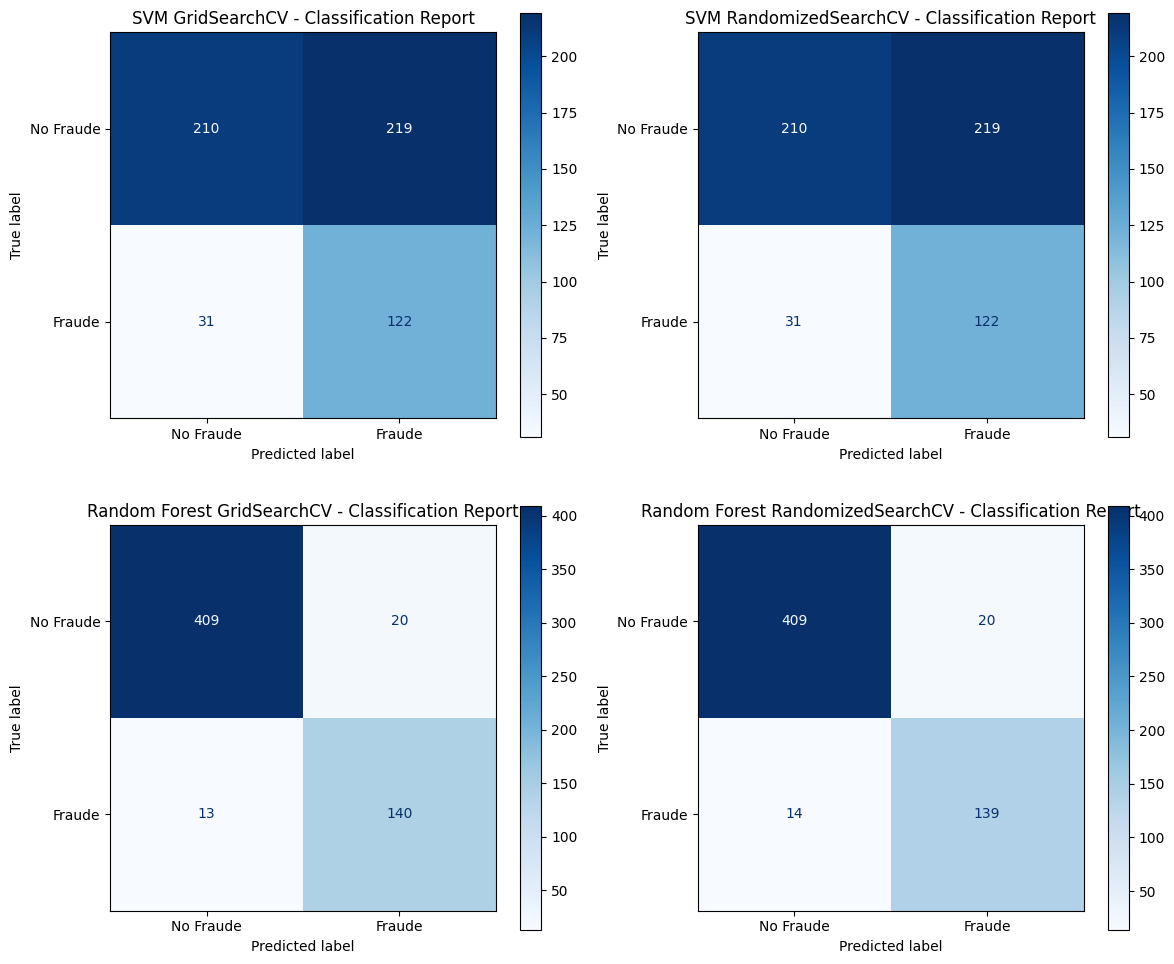

In [165]:
# Configurar la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rendimiento del modelo SVM con mejores hiperparámetros de GridSearchCV
axes[0, 0].set_title("SVM GridSearchCV - Classification Report")
ConfusionMatrixDisplay(confusion_matrix(y_test, best_svm_model.predict(X_test)), display_labels=['No Fraude', 'Fraude']).plot(ax=axes[0, 0], cmap='Blues')

# Rendimiento del modelo SVM con mejores hiperparámetros de RandomizedSearchCV
axes[0, 1].set_title("SVM RandomizedSearchCV - Classification Report")
ConfusionMatrixDisplay(confusion_matrix(y_test, best_svm_model_random.predict(X_test)), display_labels=['No Fraude', 'Fraude']).plot(ax=axes[0, 1], cmap='Blues')

# Rendimiento del modelo Random Forest con mejores hiperparámetros de GridSearchCV
axes[1, 0].set_title("Random Forest GridSearchCV - Classification Report")
ConfusionMatrixDisplay(confusion_matrix(y_test, best_rf_model.predict(X_test)), display_labels=['No Fraude', 'Fraude']).plot(ax=axes[1, 0], cmap='Blues')

# Rendimiento del modelo Random Forest con mejores hiperparámetros de RandomizedSearchCV
axes[1, 1].set_title("Random Forest RandomizedSearchCV - Classification Report")
ConfusionMatrixDisplay(confusion_matrix(y_test, best_rf_model_random.predict(X_test)), display_labels=['No Fraude', 'Fraude']).plot(ax=axes[1, 1], cmap='Blues')

# Ajustar el diseño
plt.tight_layout()

# Guardar la figura como una imagen
#plt.savefig('../resultados/classification_reports_punto_6.png')

# Mostrar la figura
plt.show()

# Punto 7


La arquitectura creada y diseñada muestras sus diferentes fases de diseño y solución en la documentacion.docx en la carpeta docs